In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("device_failure.csv", encoding = 'latin')

In [4]:
df.shape

(124494, 12)

In [157]:
df.isna().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [163]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001983,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001983,1.000000,-0.004250,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,0.001121
attribute2,0.052902,-0.004250,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003701,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001836,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003376,-0.013999,-0.006696,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001522,-0.026350,0.009027,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001121,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


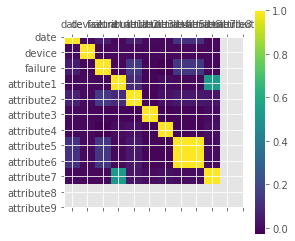

In [165]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

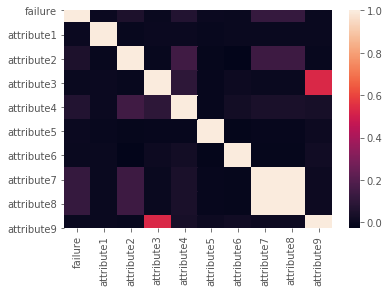

In [167]:
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

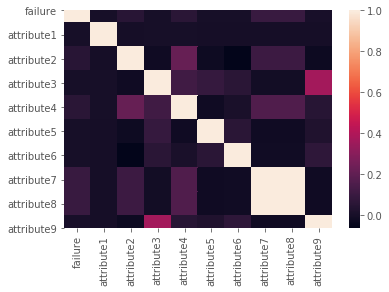

In [168]:
corr = df.corr(method = 'kendall')
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

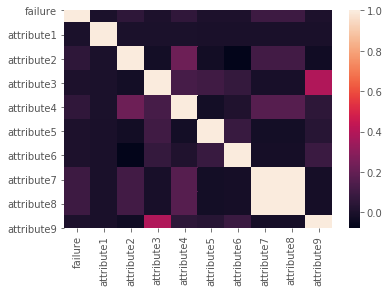

In [169]:
corr = df.corr(method = 'spearman')
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [139]:
df[df.device == 'Z1F1AG5N']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
1142,2015-01-01,Z1F1AG5N,0,193717560,0,0,4,6,19,0,0,0
2305,2015-01-02,Z1F1AG5N,0,68106024,0,0,4,6,19,0,0,0
3468,2015-01-03,Z1F1AG5N,0,79444248,0,0,4,6,19,0,0,0
4630,2015-01-04,Z1F1AG5N,0,13961040,0,0,4,6,19,0,0,0
5791,2015-01-05,Z1F1AG5N,0,136887016,0,0,4,6,19,0,0,0
6848,2015-01-06,Z1F1AG5N,0,75155640,0,0,4,6,19,0,0,0
78570,2015-05-06,Z1F1AG5N,0,222479304,32,0,10,7,24,0,0,0
78975,2015-05-07,Z1F1AG5N,0,151420664,32,0,10,7,24,0,0,0
79379,2015-05-08,Z1F1AG5N,1,13095344,32,0,10,7,24,0,0,0


In [87]:
df = clean_date(df, 'date')

In [9]:
df.date.min(),df.date.max()

('2015-01-01', '2015-11-02')

In [11]:
df.device.nunique(), df.date.nunique(), df.device.nunique() * df.date.nunique()

(1169, 304, 355376)

In [5]:
def clean_date(df, col):
    results = []
    for element in df[col]:
        try:
            results.append(pd.to_datetime(element))
        except:
            results.append(np.nan)
    df[col] = results
    return df

In [66]:
date_n = pd.DataFrame({'date': df.date.value_counts().index,'values': df.date.value_counts().values}).sort_values(by = 'date')

date_n.set_index('date', drop = True, inplace = True)

In [220]:
date_n_f = pd.DataFrame({'date': df[df.failure == 1].date.value_counts().index,'values': df[df.failure == 1].date.value_counts().values}).sort_values(by = 'date')

date_n_f.set_index('date', drop = True, inplace = True)

In [221]:
date_n_f.sort_values(by = 'values')

,values
date,
2015-01-05,1
2015-04-09,1
2015-04-17,1
2015-04-20,1
2015-04-21,1
...,...
2015-03-19,2
2015-07-09,2
2015-05-08,3


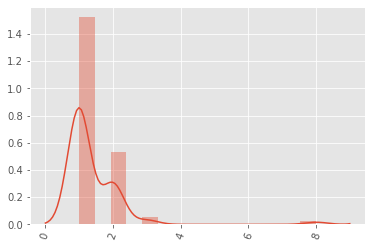

In [222]:
#plt.plot(date_n)
sns.distplot(date_n_f)
plt.xticks(rotation=70)
#plt.xticks(date_n.index, rotation='vertical')
plt.show()


In [76]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [88]:
failure_date = df.groupby('date').agg({'failure':'mean' }).sort_index()

In [89]:
failure_date

,failure
date,
2015-01-01,0.000000
2015-01-02,0.000000
2015-01-03,0.000000
2015-01-04,0.000000
2015-01-05,0.000861
...,...
2015-10-27,0.000000
2015-10-29,0.000000
2015-10-30,0.000000


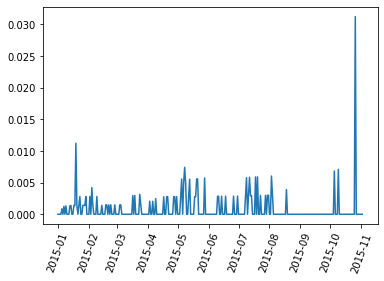

In [90]:
plt.plot(failure_date)
plt.xticks(rotation=70)
#plt.xticks(date_n.index, rotation='vertical')
plt.show()


In [92]:
df[df['device'] == 'S1F01JE0']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
1166,2015-01-02,S1F01JE0,0,109398680,0,0,0,6,410186,0,0,0
2329,2015-01-03,S1F01JE0,0,235562856,0,0,0,6,410186,0,0,0
3492,2015-01-04,S1F01JE0,0,235473648,0,0,0,6,410188,0,0,0
4654,2015-01-05,S1F01JE0,0,158246712,0,0,0,6,410888,0,0,0
5815,2015-01-06,S1F01JE0,0,185424928,0,0,0,6,412151,0,0,0


In [93]:
df.failure.sum()

106

In [94]:
df.shape

(124494, 12)

In [98]:
df[df.failure == 1].device.nunique()

106

In [101]:
df[df.failure == 1]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-08-04,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,2015-10-05,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,2015-10-09,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [139]:
df[df.device == 'Z1F1AG5N']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
1142,2015-01-01,Z1F1AG5N,0,193717560,0,0,4,6,19,0,0,0
2305,2015-01-02,Z1F1AG5N,0,68106024,0,0,4,6,19,0,0,0
3468,2015-01-03,Z1F1AG5N,0,79444248,0,0,4,6,19,0,0,0
4630,2015-01-04,Z1F1AG5N,0,13961040,0,0,4,6,19,0,0,0
5791,2015-01-05,Z1F1AG5N,0,136887016,0,0,4,6,19,0,0,0
6848,2015-01-06,Z1F1AG5N,0,75155640,0,0,4,6,19,0,0,0
78570,2015-05-06,Z1F1AG5N,0,222479304,32,0,10,7,24,0,0,0
78975,2015-05-07,Z1F1AG5N,0,151420664,32,0,10,7,24,0,0,0
79379,2015-05-08,Z1F1AG5N,1,13095344,32,0,10,7,24,0,0,0


In [144]:
df[df.attribute1 <0]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9


In [145]:
df.attribute1.sort_values()

41778            0
7844             0
92532            0
80233            0
6878             0
           ...    
83627    244133240
7795     244135688
74773    244136552
10873    244138600
68938    244140480
Name: attribute1, Length: 124494, dtype: int64

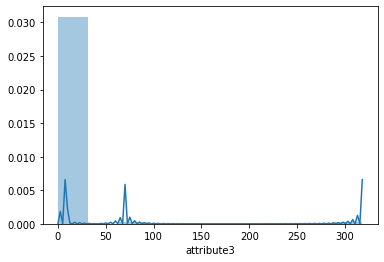

In [33]:
sns.distplot(df[df.failure == 1].attribute3)
plt.show()

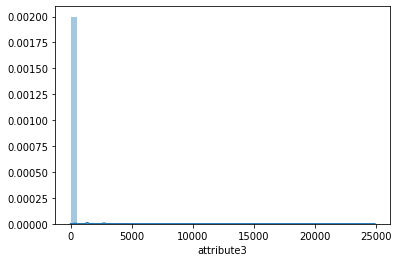

In [32]:
sns.distplot(df[df.failure == 0].attribute3)
plt.show()

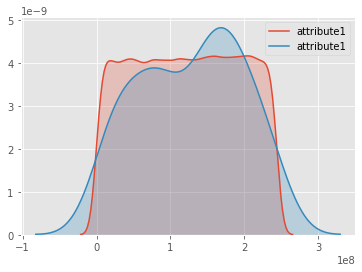

In [191]:
sns.kdeplot(df.attribute1, shade =True)
sns.kdeplot(df[df.failure == 1].attribute1, shade =True)
plt.show()

In [193]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [29]:
df[df.failure == 0].describe(percentiles = [0.95, ])

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124388.0,1.243880e+05,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000
mean,0.0,1.223840e+08,156.118725,9.945598,1.696048,14.221613,260174.250587,0.266682,0.266682,12.442462
std,0.0,7.046036e+07,2145.521965,185.824103,22.164316,15.943381,99147.843106,6.558071,6.558071,191.455015
min,0.0,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
50%,0.0,1.227861e+08,0.000000,0.000000,0.000000,10.000000,249794.000000,0.000000,0.000000,0.000000
95%,0.0,2.318711e+08,8.000000,1.000000,6.000000,58.000000,443086.200000,0.000000,0.000000,11.000000
max,0.0,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [19]:
df[df.failure == 1].describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,106.0,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.0,1.271755e+08,4109.433962,3.905660,54.632075,15.462264,258303.481132,30.622642,30.622642,23.084906
std,0.0,6.940167e+07,12803.747239,31.557213,193.492528,15.547270,103349.308593,117.033610,117.033610,153.449984
min,1.0,4.527376e+06,0.000000,0.000000,0.000000,3.000000,24.000000,0.000000,0.000000,0.000000
25%,1.0,7.046235e+07,0.000000,0.000000,0.000000,8.000000,230028.750000,0.000000,0.000000,0.000000
50%,1.0,1.391173e+08,0.000000,0.000000,1.500000,10.000000,267648.500000,0.000000,0.000000,0.000000
75%,1.0,1.837066e+08,1182.000000,0.000000,18.750000,14.000000,309156.000000,16.000000,16.000000,1.000000
max,1.0,2.432612e+08,64784.000000,318.000000,1666.000000,91.000000,574599.000000,832.000000,832.000000,1165.000000


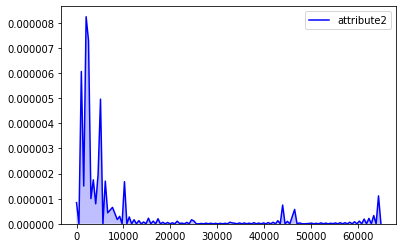

In [20]:
sns.kdeplot(df['attribute2'], color = 'b', shade =True)

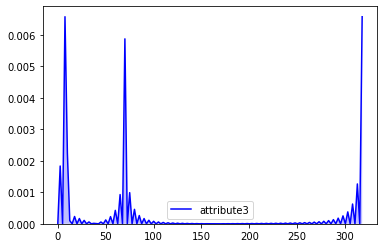

In [34]:
sns.kdeplot(df[df.failure == 1]['attribute3'], color = 'b', shade =True)

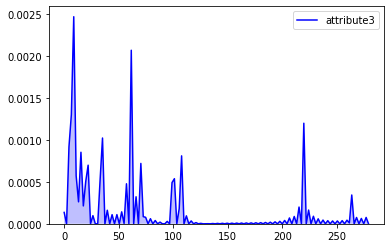

In [40]:
sns.kdeplot(df[(df.failure == 0)
              &(df.attribute3 < 300)]['attribute3'], color = 'b', shade =True)

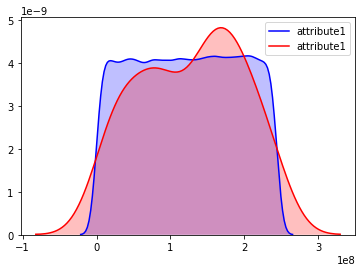

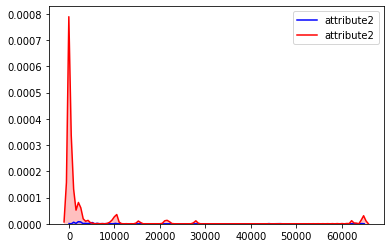

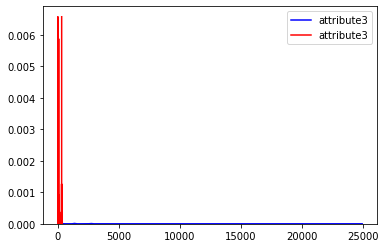

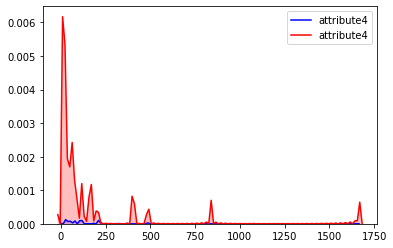

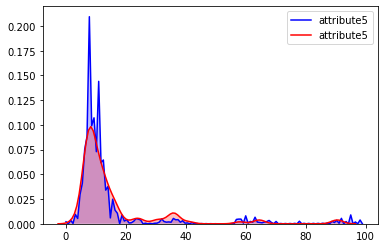

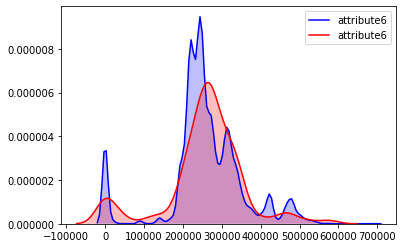

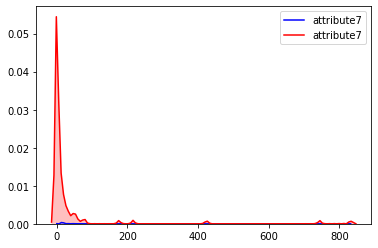

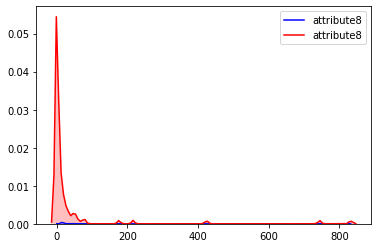

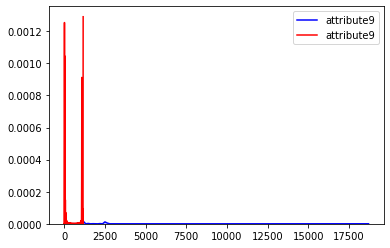

In [24]:
attribute_list = ['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']

for attribute in attribute_list:
    sns.kdeplot(df[df.failure == 0][attribute], color = 'b', shade =True)
    sns.kdeplot(df[df.failure == 1][attribute], color = 'r', shade =True)
    plt.show()
    

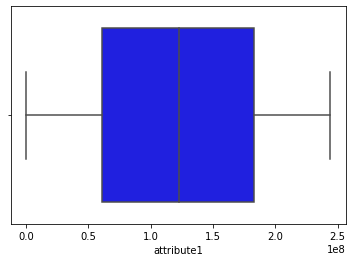

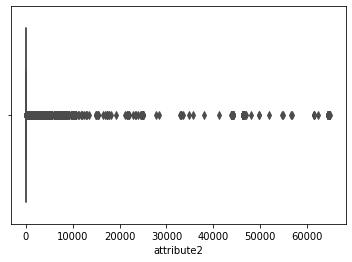

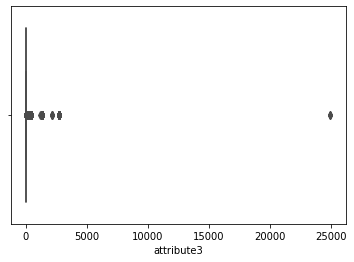

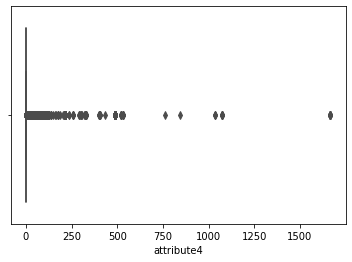

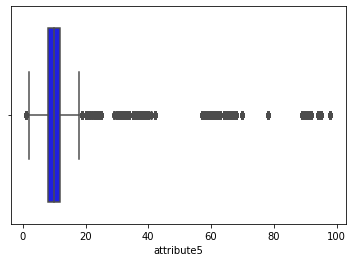

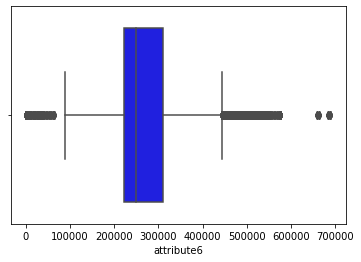

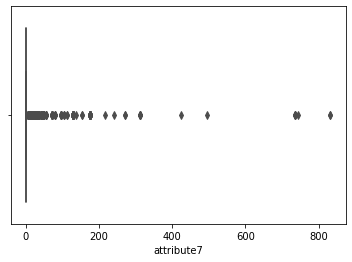

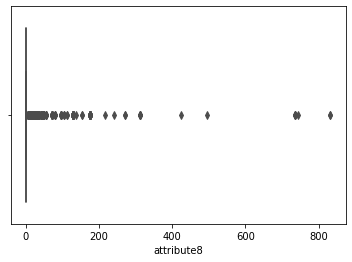

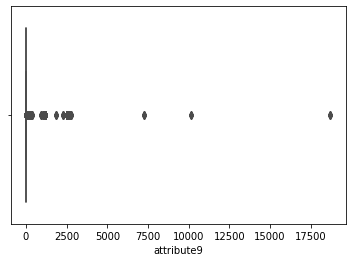

In [25]:
attribute_list = ['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']

for attribute in attribute_list:
    sns.boxplot(df[attribute], color = 'b')
   # sns.boxplot(df[df.failure == 1][attribute], color = 'r')
    plt.show()
    

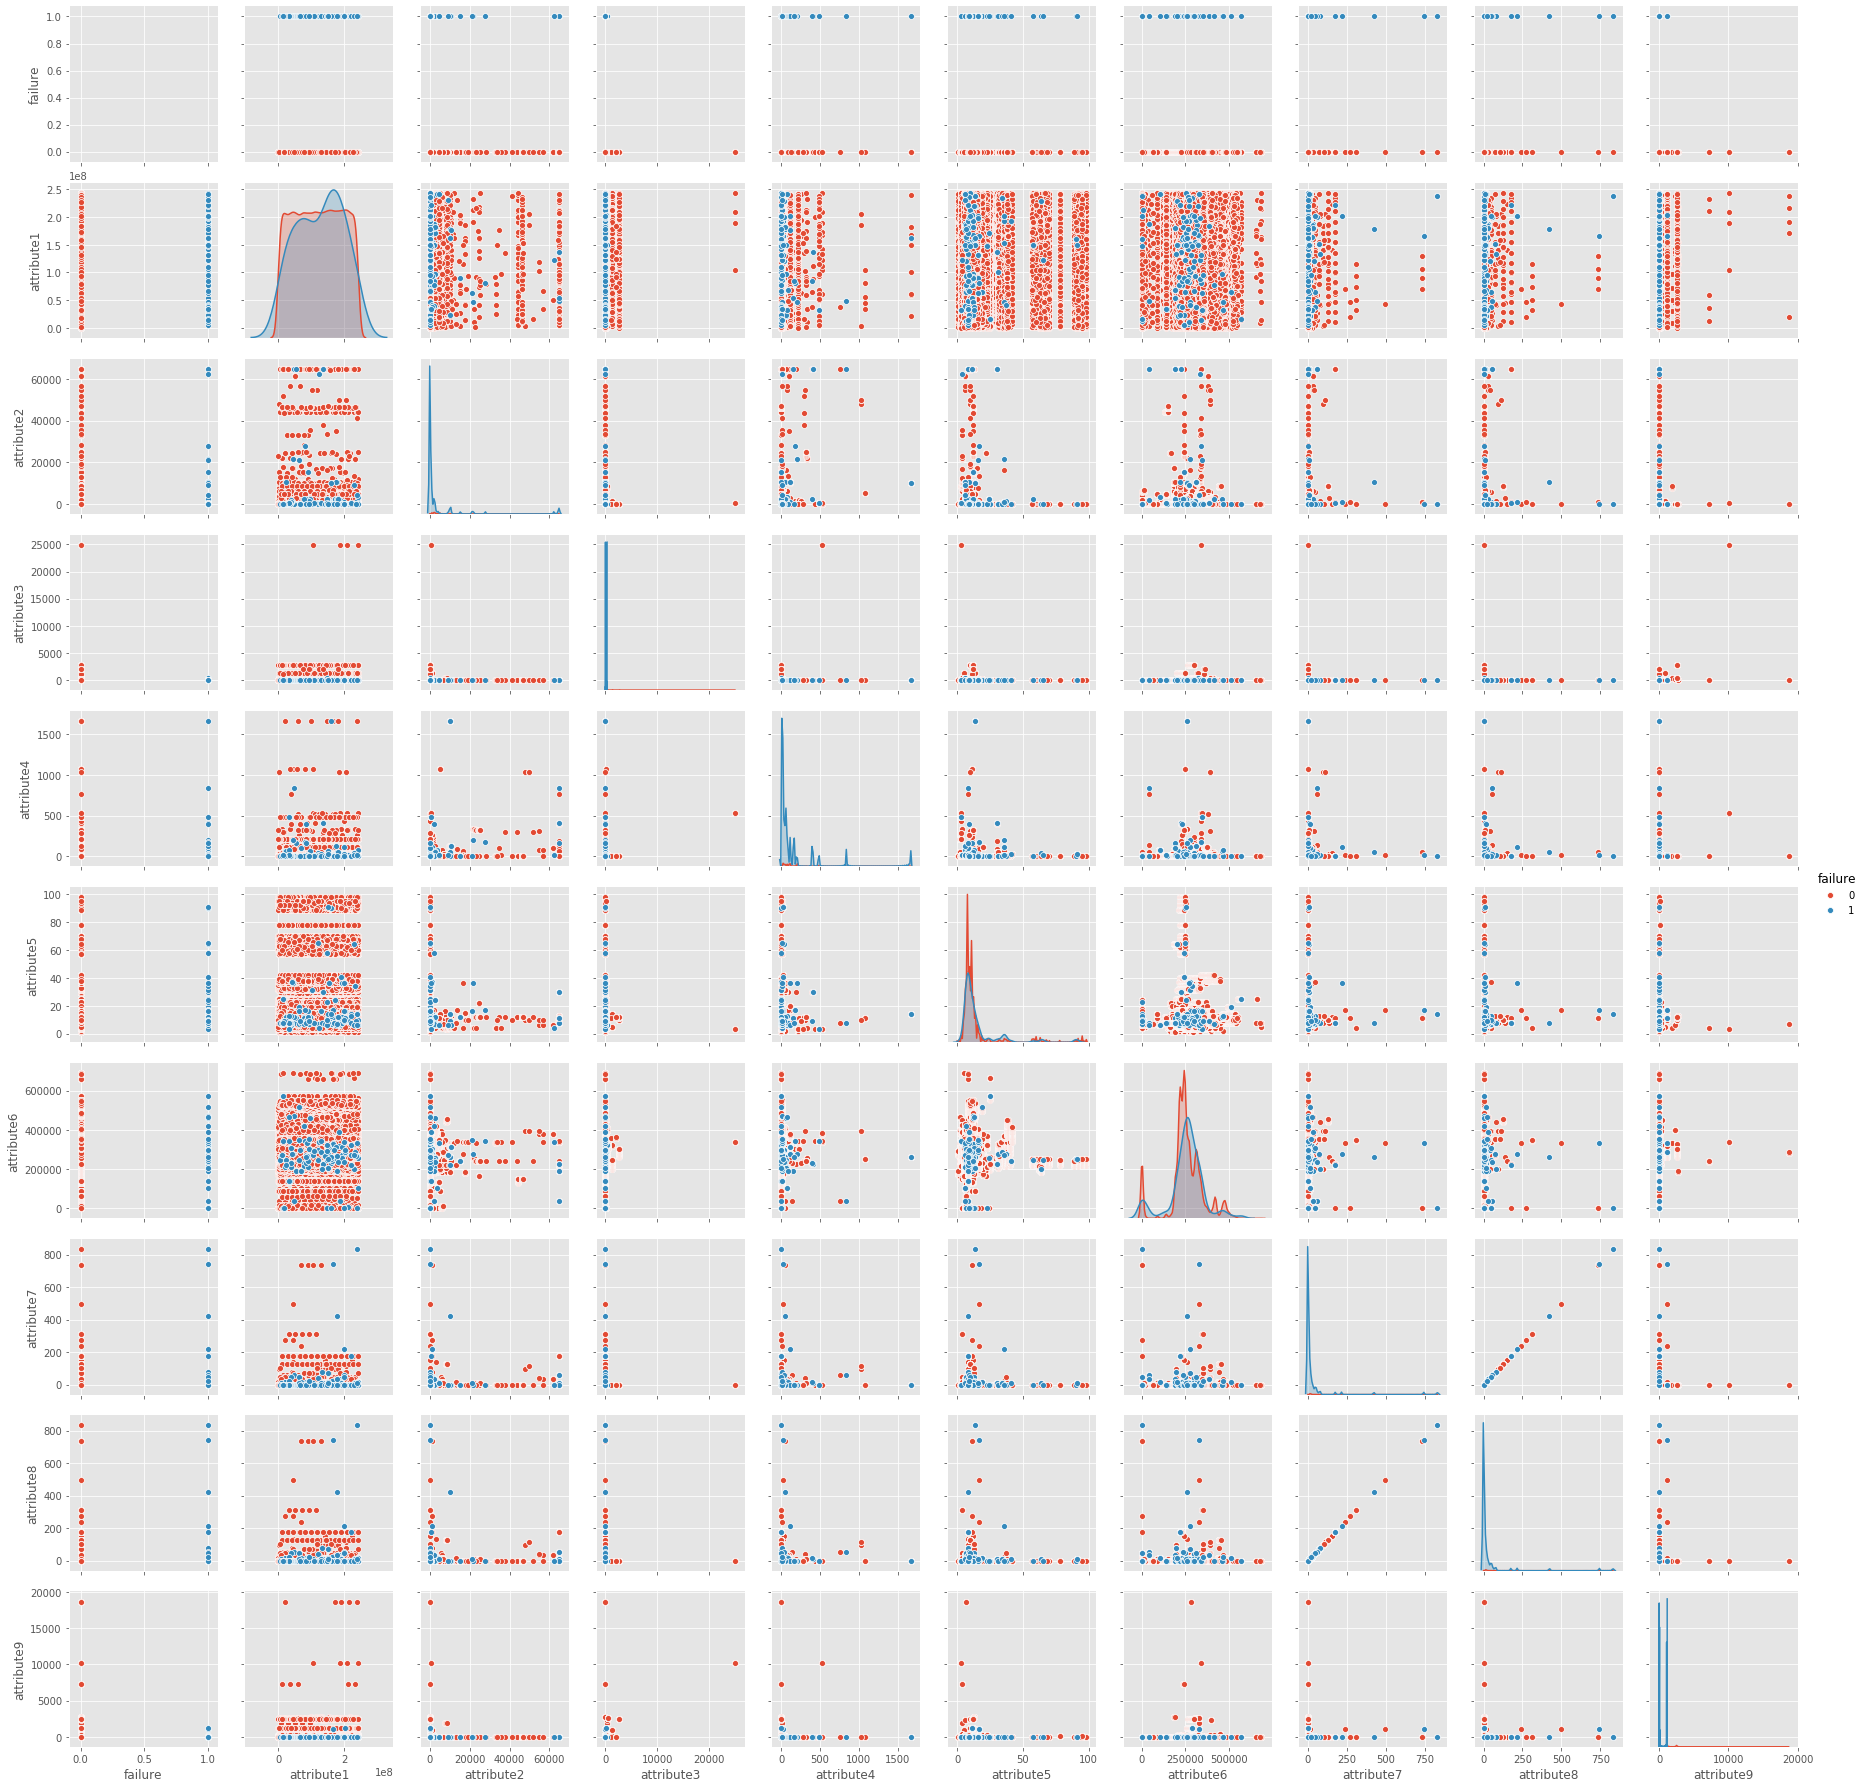

In [196]:
cols = ['failure','attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']
sns.pairplot(df[cols], hue="failure")
plt.show()

In [186]:
df[df.failure == 1].describe().attribute1

count    1.060000e+02
mean     1.271755e+08
std      6.940167e+07
min      4.527376e+06
25%      7.046235e+07
50%      1.391173e+08
75%      1.837066e+08
max      2.432612e+08
Name: attribute1, dtype: float64

In [149]:
df.describe().attribute1

count    1.244940e+05
mean     1.223881e+08
std      7.045933e+07
min      0.000000e+00
25%      6.128476e+07
50%      1.227974e+08
75%      1.833096e+08
max      2.441405e+08
Name: attribute1, dtype: float64

In [156]:
pd.cut(df.attribute1, 2, include_lowest= True)

0         (122070240.0, 244140480.0]
1         (-244140.481, 122070240.0]
2         (122070240.0, 244140480.0]
3         (-244140.481, 122070240.0]
4         (122070240.0, 244140480.0]
                     ...            
124489    (-244140.481, 122070240.0]
124490    (122070240.0, 244140480.0]
124491    (-244140.481, 122070240.0]
124492    (122070240.0, 244140480.0]
124493    (-244140.481, 122070240.0]
Name: attribute1, Length: 124494, dtype: category
Categories (2, interval[float64]): [(-244140.481, 122070240.0] < (122070240.0, 244140480.0]]

In [159]:
df[df.attribute1 <= 122070240].shape, df[df.attribute1 > 122070240].shape

((61895, 12), (62599, 12))

In [138]:
df.nunique()

date             304
device          1169
failure            2
attribute1    123877
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [109]:
import numpy as np

In [133]:
x = df.groupby('device').agg({'device':'count','failure':[np.max,np.mean]})
x.columns = ['device_count', 'failure_max', 'failure_mean']
x.reset_index(inplace = True)

In [136]:
x.sort_values(by = 'failure_mean')

,device,device_count,failure_max,failure_mean
0,S1F01085,6,0,0.000000
749,W1F0X47W,86,0,0.000000
750,W1F0X4AK,6,0,0.000000
751,W1F0X4CX,6,0,0.000000
752,W1F0X4F6,19,0,0.000000
...,...,...,...,...
1148,Z1F1AG5N,9,1,0.111111
447,S1F11MB0,7,1,0.142857
67,S1F0CTDN,7,1,0.142857
401,S1F10E6M,7,1,0.142857


In [99]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [43]:
df.date.value_counts().index

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-09', '2015-01-08', '2015-01-11',
       ...
       '2015-10-22', '2015-10-25', '2015-10-26', '2015-10-24', '2015-10-23',
       '2015-10-29', '2015-10-30', '2015-10-31', '2015-10-27', '2015-11-02'],
      dtype='object', length=304)

In [23]:
devices = df.device.value_counts()

In [25]:
devices.values

array([304, 304, 304, ...,   4,   3,   1], dtype=int64)

In [26]:


sns.dist(devices.values)

AttributeError: module 'seaborn' has no attribute 'dist'

In [12]:
df[df.device == "S1F01085"].date.nunique()

6

In [13]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [19]:
df.nunique()

date             304
device          1169
failure            2
attribute1    123877
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [18]:
df[[ 'date', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']].drop_duplicates().shape

(124493, 11)

In [17]:
df[['date','device']].drop_duplicates().shape

(124493, 2)

In [41]:
df.shape

(124494, 12)

In [44]:
df[['device', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']].drop_duplicates().shape

(124366, 10)

In [45]:
df[['device', 'failure','attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']].drop_duplicates().shape

(124367, 11)

In [46]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [47]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [5]:
features = [ 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df[features]
y = df.failure

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)



In [7]:
y_train.sum(), y_test.sum()

(85, 21)

In [8]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9991565926342424


In [9]:
y_pred = knn.predict(X_test)

In [10]:
y_pred.sum()

0

In [11]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [12]:
### Undersampling
import numpy as np



n_failure = len(df[df['failure'] == 1])
non_failure_indices = len(df[df['failure'] == 0])
random_indices = np.random.choice(non_failure_indices,int(n_failure), replace=False)



failure_indices = df[df.failure == 1].index
under_sample_indices = np.concatenate([failure_indices,random_indices])

under_sample = df.loc[under_sample_indices]


In [13]:
under_sample

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122885,2015-10-10,W1F0M02P,0,145369008,0,1,6,10,550653,0,0,33
53052,2015-03-13,W1F0ZG5V,0,18103976,0,0,0,8,402582,0,0,0
15461,2015-01-18,W1F0TGSS,0,60395056,0,0,0,12,302214,0,0,0
40176,2015-02-22,W1F0P133,0,56464592,0,0,0,38,251518,0,0,0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = under_sample[features]
y = under_sample.failure

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)



In [15]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.5348837209302325


In [22]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)




RandomForestClassifier(max_depth=4, random_state=0)

In [27]:
clf.score(X_test, y_test)

0.7906976744186046

In [23]:
y_pred = clf.predict(X_test)

In [24]:
y_pred.sum()

16

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[20,  2],
       [ 7, 14]], dtype=int64)

In [70]:
14/(14+8)

0.6363636363636364